# Exploratory Data Analysis (EDA)

## Import Python Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

## Phase 1: Analyzing Data

In this phase, we will examine the structure of our dataset to understand its contents and detect potential issues, such as missing values, duplicates, and data inconsistencies. We will also perform some initial data preprocessing steps. The tasks we will focus on include:

- **Shape** of the dataset
- **Dataset Info** (column names, data types)
- **Missing Values** (checking and handling missing data)
- **Duplicated Data** (identifying and removing duplicates)
- **Data Type Corrections** (correcting inconsistent data values, e.g., replacing 101 with 100 for `Claim`)
- **Categorical and Numerical Variables** (separating the variables into categories)
- **Descriptive Statistics** (providing summary statistics for numerical columns)


In [55]:
data=pd.read_csv("train_Insurance.csv")
data.shape

(5012, 13)

In [56]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [57]:
data.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non
5011,H18228,2013,1.0,1,V,V,V,U,NaN,Wood-framed,without,NaN,non


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [59]:
data.duplicated().sum()

np.int64(0)

In [60]:
data.nunique()

Customer Id           5012
YearOfObservation        5
Insured_Period           2
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    1683
Building_Type            4
NumberOfWindows         11
Geo_Code              1115
Claim                    2
dtype: int64

In [61]:
data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [62]:
(data.isnull().sum()/(len(data)))*100

Customer Id           0.000000
YearOfObservation     0.000000
Insured_Period        0.000000
Residential           0.000000
Building_Painted      0.000000
Building_Fenced       0.000000
Garden                0.079808
Settlement            0.000000
Building Dimension    1.536313
Building_Type         0.000000
NumberOfWindows       0.000000
Geo_Code              1.456504
Claim                 0.000000
dtype: float64

<Axes: >

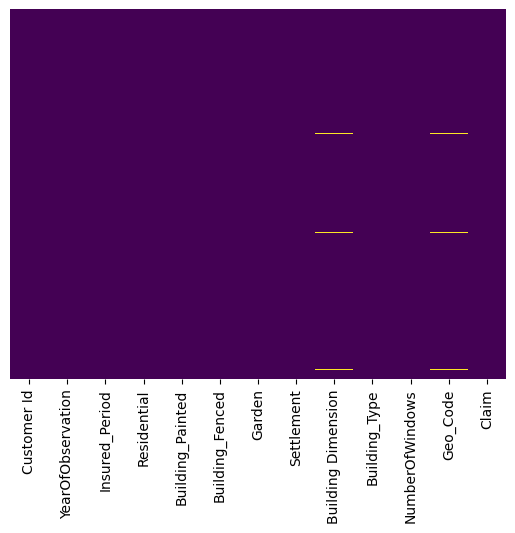

In [63]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
data.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


In [65]:
# Exploring unique values and value counts
categorical_columns = data.select_dtypes(include=['object','int64']).columns
for column in categorical_columns:
    unique_values=data[column].unique()
    counts=data[column].value_counts()
    print(f"\nUnique values in {column} : ")
    print(unique_values)
    print(f"\nCounts of each value in {column} : ")
    print(counts.to_string())




Unique values in Customer Id : 
['H13501' 'H14962' 'H17755' ... 'H16892' 'H18805' 'H18228']

Counts of each value in Customer Id : 
Customer Id
H13501    1
H14962    1
H17755    1
H13369    1
H12988    1
H3052     1
H16831    1
H19427    1
H3893     1
H14092    1
H2379     1
H16676    1
H18198    1
H2571     1
H3729     1
H15094    1
H16112    1
H12660    1
H14062    1
H15787    1
H17882    1
H14550    1
H4057     1
H18319    1
H3579     1
H2539     1
H6758     1
H4737     1
H16333    1
H16800    1
H15187    1
H16339    1
H3738     1
H6859     1
H3291     1
H17353    1
H4504     1
H15910    1
H4286     1
H14841    1
H7374     1
H1620     1
H18457    1
H18956    1
H17300    1
H4113     1
H18750    1
H14088    1
H12815    1
H2111     1
H4970     1
H5969     1
H17906    1
H15050    1
H14017    1
H267      1
H5126     1
H225      1
H6283     1
H13435    1
H12864    1
H1493     1
H16714    1
H15161    1
H1803     1
H17596    1
H6347     1
H13287    1
H14482    1
H15295    1
H7253     1
H40

In [66]:
# Seperate categorical and Numerical variables
cat_cols=data.select_dtypes(include=['object']).columns
num_cols=data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables : ")
print(cat_cols)
print("Numerical Variables : ")
print(num_cols)

Categorical Variables : 
Index(['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')
Numerical Variables : 
['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension']


## Phase 2 : Visualizing Data Distribution
To understand the distribution and potential skewness of numerical features, we visualize each column using histograms and boxplots.


- **Histogram**: Helps visualize the shape of the data and identify patterns like skewness or bimodal distributions.
- **Boxplot**: Summarizes the central tendency, spread, and highlights potential outliers in the data.

YearOfObservation
skew :  0.35


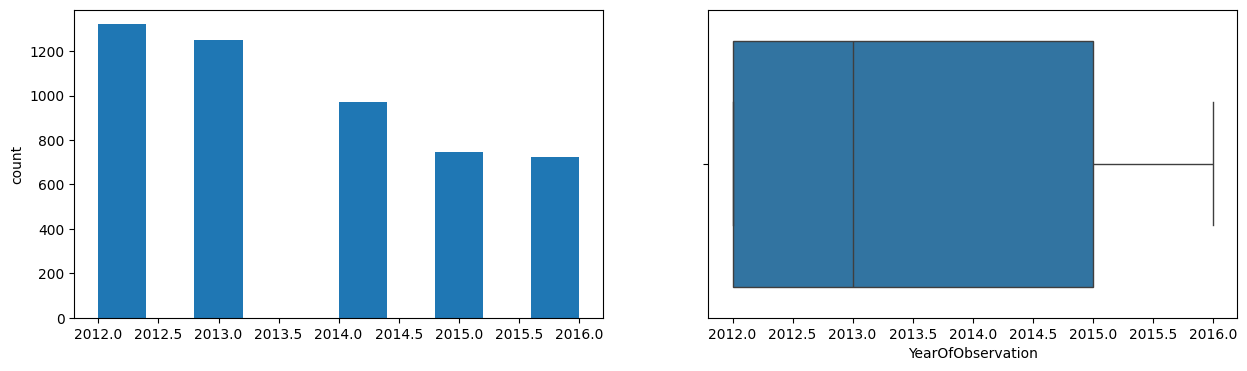

Insured_Period
skew :  -1.09


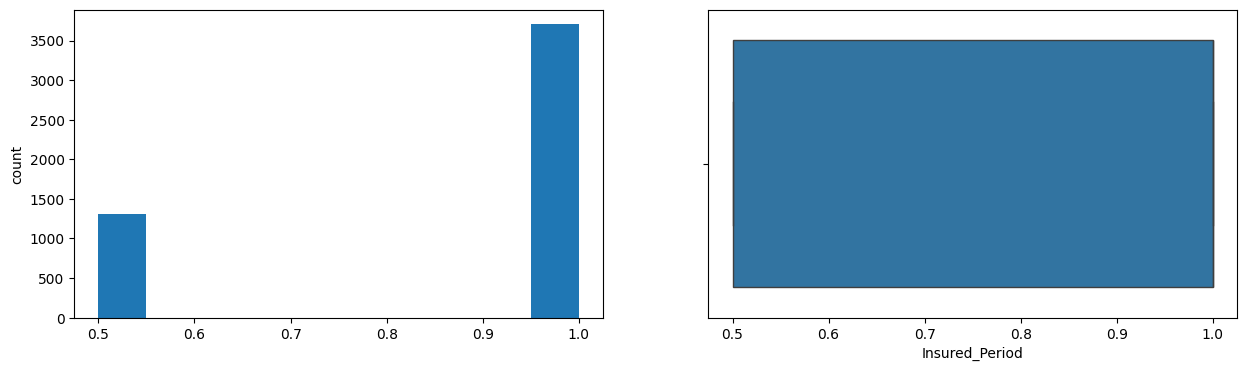

Residential
skew :  0.87


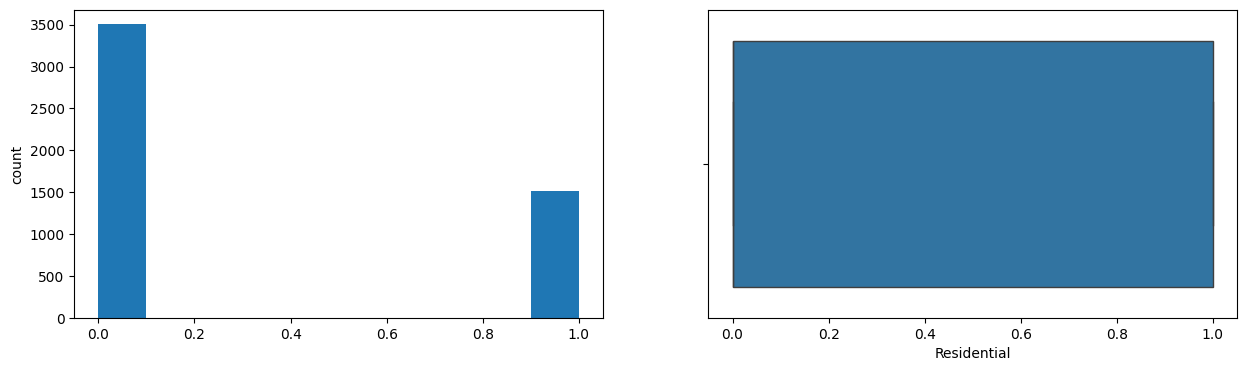

Building Dimension
skew :  3.07


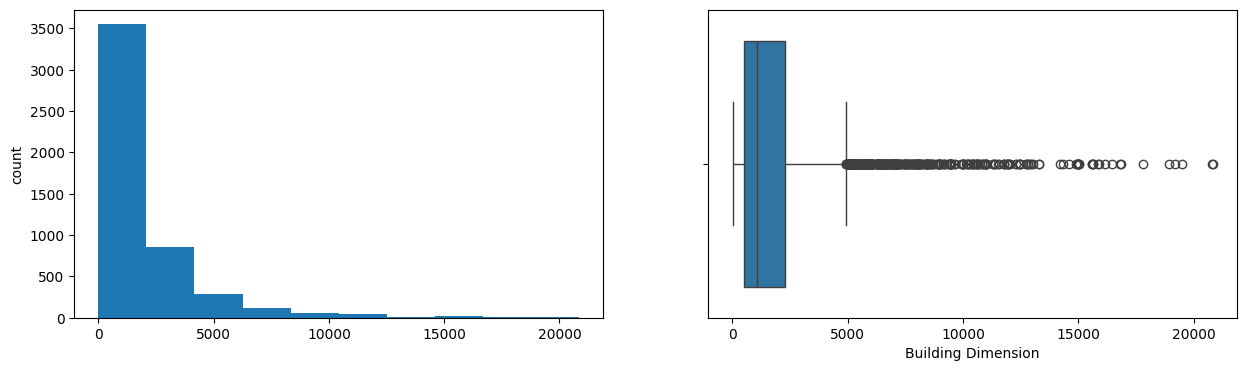

In [67]:
for col in num_cols:
    print(col)
    print("skew : ",round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

Unique values in Customer Id: ['H13501' 'H14962' 'H17755' ... 'H16892' 'H18805' 'H18228']


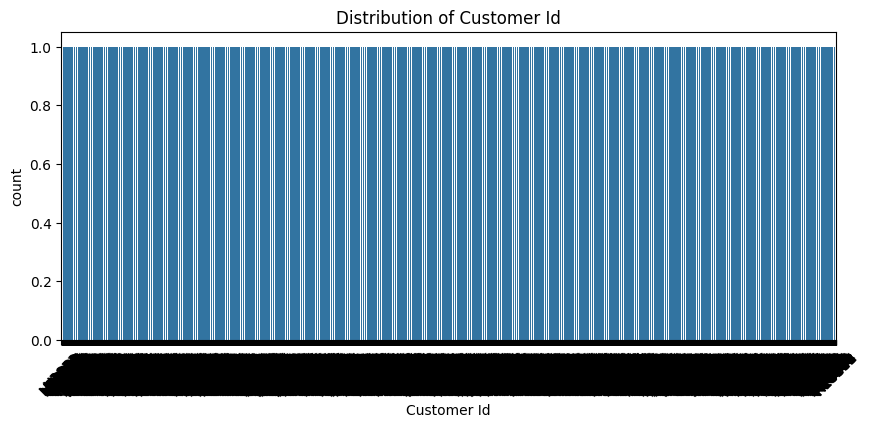

Unique values in Building_Painted: ['N' 'V']


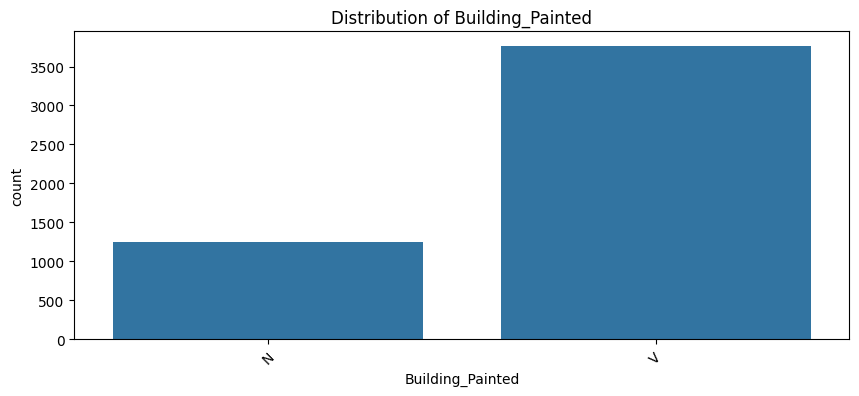

Unique values in Building_Fenced: ['V' 'N']


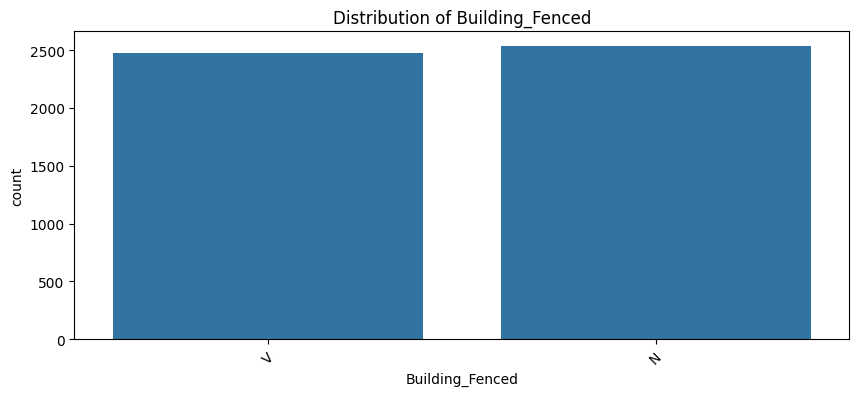

Unique values in Garden: ['V' 'O' nan]


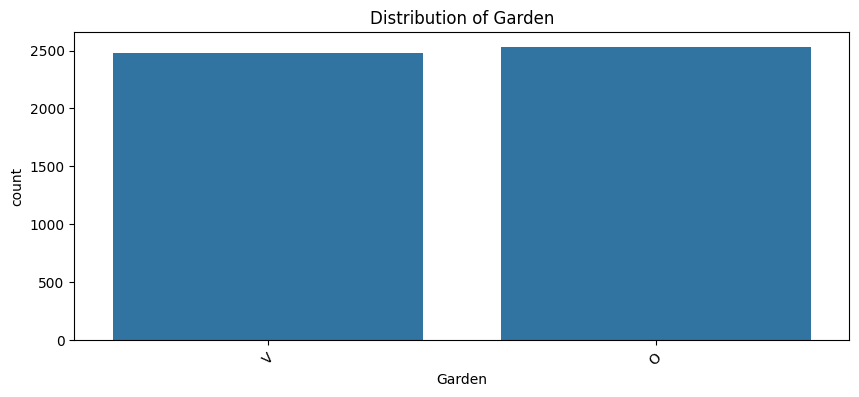

Unique values in Settlement: ['U' 'R']


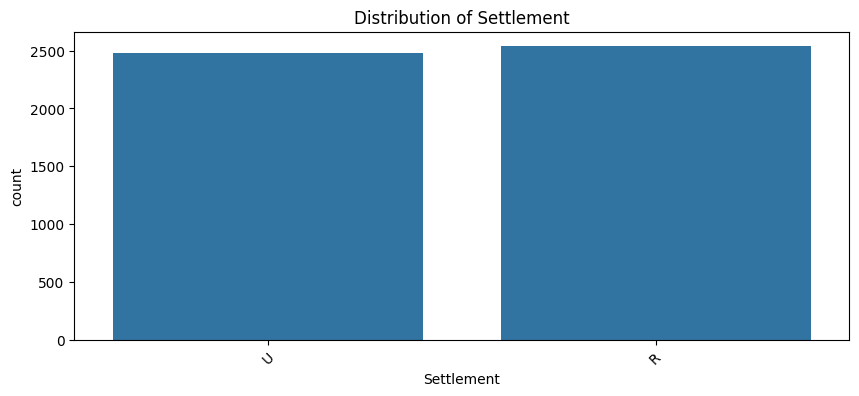

Unique values in Building_Type: ['Wood-framed' 'Non-combustible' 'Ordinary' 'Fire-resistive']


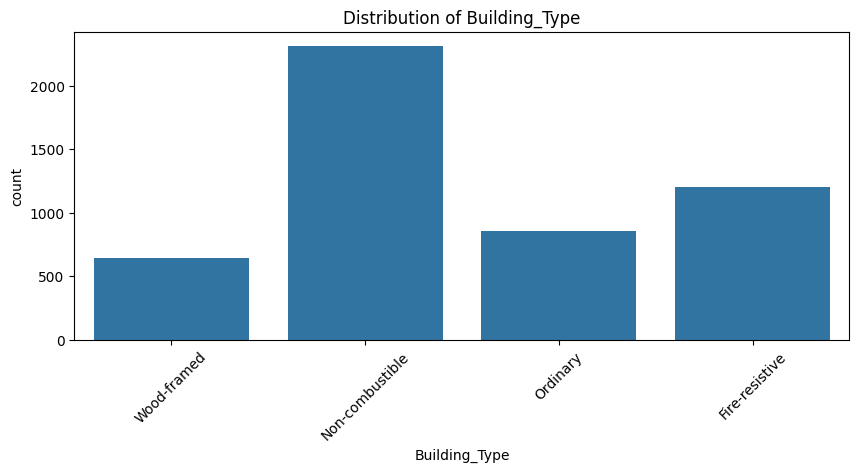

Unique values in NumberOfWindows: ['without' '4' '2' '7' '5' '3' '8' '>=10' '6' '1' '9']


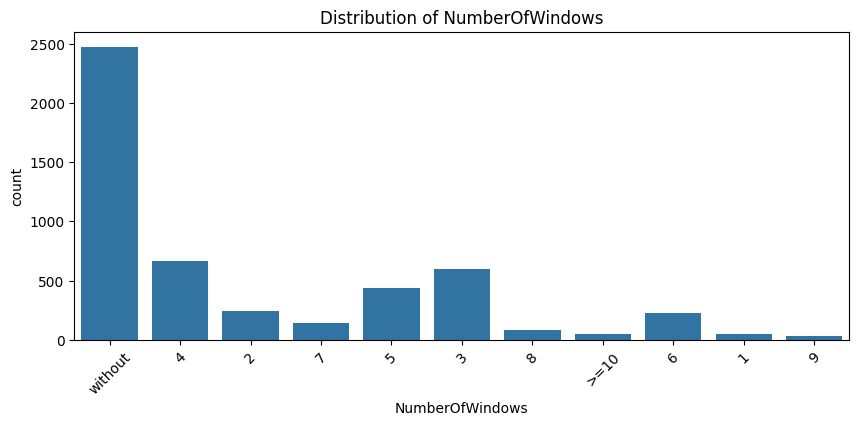

Unique values in Geo_Code: ['75117' '62916' '31149' ... '45232' '42225' '94059']


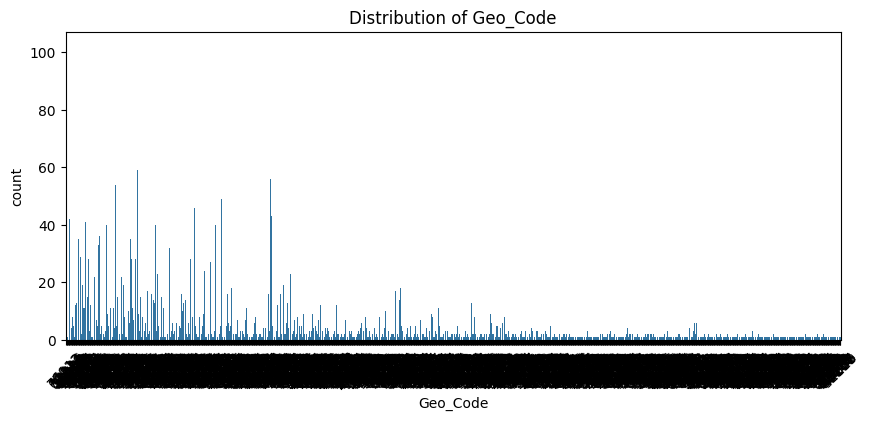

Unique values in Claim: ['non' 'oui']


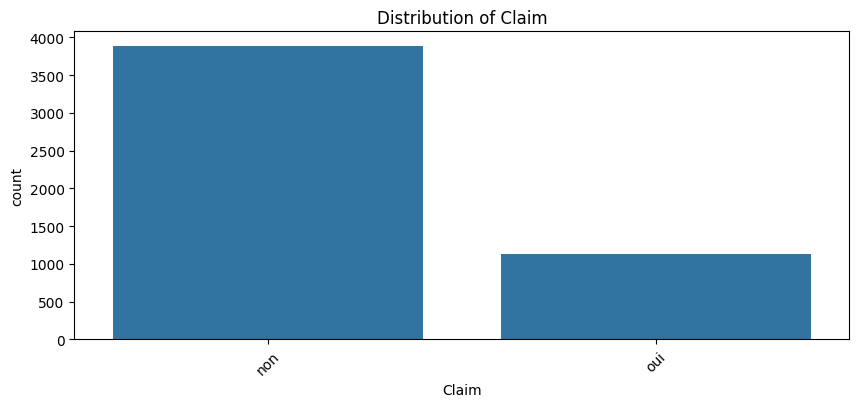

In [68]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[col])
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title(f"Distribution of {col}")
    plt.show()

## Phase 3 : Data Preparation
### Handling Missing Values in Train Data
- Missing values in the training dataset were identified.
- A strategy (e.g., mean/median imputation, or removal) was applied to handle the missing values in the training data to prepare it for modeling.


In [69]:
data.describe()


,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


In [70]:
data.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [71]:
Garden_mode=data['Garden'].mode()[0]
data['Garden'].fillna(Garden_mode,inplace=True)

/tmp/ipykernel_6498/2881872500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Garden'].fillna(Garden_mode,inplace=True)


In [72]:

building_dim_median=data["Building Dimension"].median()
data['Building Dimension'].fillna(building_dim_median,inplace=True)







/tmp/ipykernel_6498/2932031586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Building Dimension'].fillna(building_dim_median,inplace=True)


In [73]:

data['Geo_Code'] = pd.to_numeric(data['Geo_Code'], errors='coerce')
geo_code_median = data['Geo_Code'].median()
data['Geo_Code'].fillna(geo_code_median, inplace=True)




/tmp/ipykernel_6498/166015097.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Geo_Code'].fillna(geo_code_median, inplace=True)


In [74]:
data.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5012 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  5012 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            5012 non-null   float64
 12  Claim               5012 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 509.2+ KB


### Remove duplicates

In [76]:
before = data.shape[0]
data.drop_duplicates(inplace=True)
after = data.shape[0]
print("Duplicates removed:", before - after)


Duplicates removed: 0


### Encoding Categorical Features in Validatin and Test Data
Label encoding for all binary categorical attributes (N/V, O/V, R/U, non/oui) and numerical mapping for the window counts.
One-hot encoding to the multi-class feature Building_Type to create separate boolean columns.

In [77]:
data.drop(columns=['Customer Id'], inplace=True)


# ----------- 2. Binary Label Encoding -----------
binary_map = {
    'Building_Painted': {'N': 0, 'V': 1},
    'Building_Fenced': {'N': 0, 'V': 1},
    'Garden': {'O': 0, 'V': 1},
    'Settlement': {'R': 0, 'U': 1},
    'Claim': {'non': 0, 'oui': 1}
}

for col, mapping in binary_map.items():
    data[col] = data[col].map(mapping)


# ----------- 3. One-Hot Encoding for Building_Type -----------
data = pd.get_dummies(data, columns=['Building_Type'], drop_first=True)

# ----------- 4. Convert NumberOfWindows to numeric -----------
def map_windows(x):
    if x == 'without':
        return 0
    if x == '>=10':
        return 10
    return int(x)

data['NumberOfWindows'] = data['NumberOfWindows'].apply(map_windows)

# ----------- 5. Check final structure -----------
print(data.head())
print(data.dtypes)
print(data.shape)


   YearOfObservation  Insured_Period  Residential  Building_Painted  \
0               2012             1.0            1                 0   
1               2012             1.0            0                 0   
2               2013             1.0            1                 1   
3               2016             0.5            0                 0   
4               2012             1.0            0                 0   

   Building_Fenced  Garden  Settlement  Building Dimension  NumberOfWindows  \
0                1       1           1              1240.0                0   
1                1       1           1               900.0                0   
2                0       0           0              4984.0                4   
3                1       1           1               600.0                0   
4                1       1           1               900.0                0   

   Geo_Code  Claim  Building_Type_Non-combustible  Building_Type_Ordinary  \
0   75117.0      0   

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YearOfObservation              5012 non-null   int64  
 1   Insured_Period                 5012 non-null   float64
 2   Residential                    5012 non-null   int64  
 3   Building_Painted               5012 non-null   int64  
 4   Building_Fenced                5012 non-null   int64  
 5   Garden                         5012 non-null   int64  
 6   Settlement                     5012 non-null   int64  
 7   Building Dimension             5012 non-null   float64
 8   NumberOfWindows                5012 non-null   int64  
 9   Geo_Code                       5012 non-null   float64
 10  Claim                          5012 non-null   int64  
 11  Building_Type_Non-combustible  5012 non-null   bool   
 12  Building_Type_Ordinary         5012 non-null   b

## Phase 4 : Feature Selection

#### We analyzed which features are most useful for predicting the target 'Claim'.
#### 1. Calculated the correlation of numerical features with 'Claim' to see their linear relationship.
#### 2. Dropped features with very low correlation (close to 0), as they provide almost no predictive value.
#### 3. Kept features with higher correlation, as they are more likely to influence insurance claims.
#### The resulting dataset contains only the most relevant features for modeling.



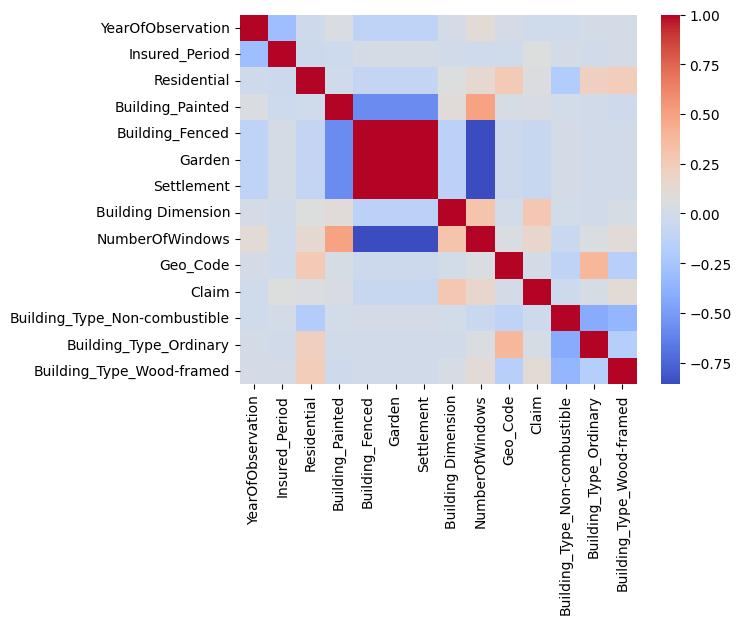

In [79]:


corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()


In [84]:
corr_target = corr['Claim'].sort_values(ascending=False)
print(corr_target)


Claim                            1.000000
Building Dimension               0.286590
NumberOfWindows                  0.155361
Building_Type_Wood-framed        0.110850
Insured_Period                   0.070145
Residential                      0.055220
Building_Painted                 0.036031
Building_Type_Ordinary           0.020522
Geo_Code                         0.000705
YearOfObservation               -0.020188
Building_Type_Non-combustible   -0.038330
Building_Fenced                 -0.069308
Settlement                      -0.069836
Garden                          -0.070050
Name: Claim, dtype: float64


In [85]:
weak_features = [
    'Building_Painted',
    'Building_Type_Ordinary',
    'Geo_Code',
    'YearOfObservation',
    'Building_Type_Non-combustible',
    'Building_Fenced',
    'Settlement',
    'Garden'
]

data.drop(columns=weak_features, inplace=True)


# Phase 5 : Training and validation 


Training LogisticRegression...
LogisticRegression - Accuracy: 0.7876, Precision: 0.6200, Recall: 0.1378, F1-score: 0.2255


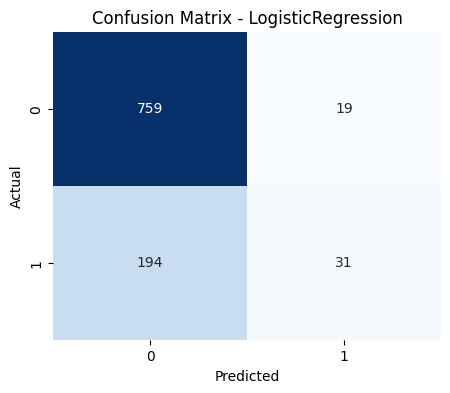


Training RandomForestClassifier...
RandomForestClassifier - Accuracy: 0.7049, Precision: 0.3251, Recall: 0.2933, F1-score: 0.3084


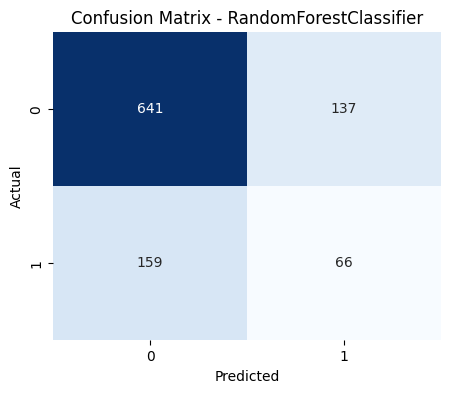


Training XGBClassifier...
XGBClassifier - Accuracy: 0.7787, Precision: 0.5140, Recall: 0.2444, F1-score: 0.3313


/home/oubaid/ci2/ML2/projet/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [06:43:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


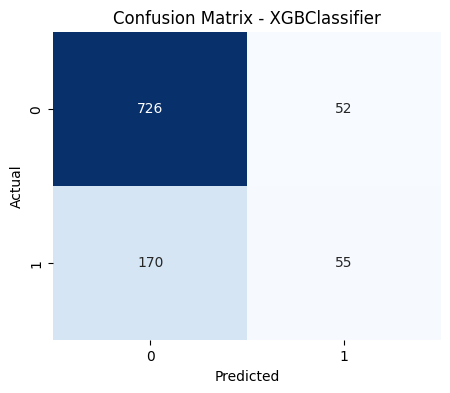


Training SVC...
SVC - Accuracy: 0.7856, Precision: 0.5962, Recall: 0.1378, F1-score: 0.2238


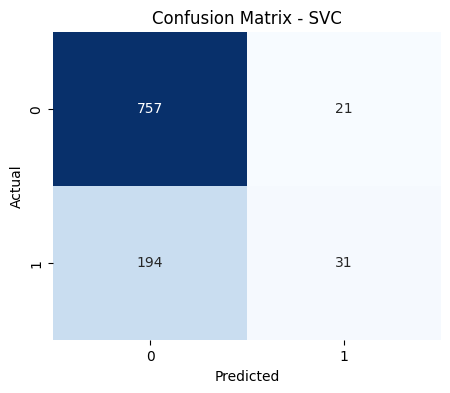


Summary Results:

Model: LogisticRegression
Accuracy: 0.7876
Precision: 0.6200
Recall: 0.1378
F1-score: 0.2255

Model: RandomForestClassifier
Accuracy: 0.7049
Precision: 0.3251
Recall: 0.2933
F1-score: 0.3084

Model: XGBClassifier
Accuracy: 0.7787
Precision: 0.5140
Recall: 0.2444
F1-score: 0.3313

Model: SVC
Accuracy: 0.7856
Precision: 0.5962
Recall: 0.1378
F1-score: 0.2238


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------- 1. Train/Test Split --------------------
X = data.drop('Claim', axis=1)
y = data['Claim']

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------- 2. List of Models --------------------
classifiers = [
    LogisticRegression(max_iter=1000, random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    SVC(probability=True, random_state=42)
]

results = {}

# -------------------- 3. Training, Prediction, Evaluation --------------------
for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}...")

    # Fit model
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_val)

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store results
    results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    }

    # Print metrics
    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

    # Confusion Matrix Plot
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# -------------------- 4. Summary --------------------
print("\nSummary Results:")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
